(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

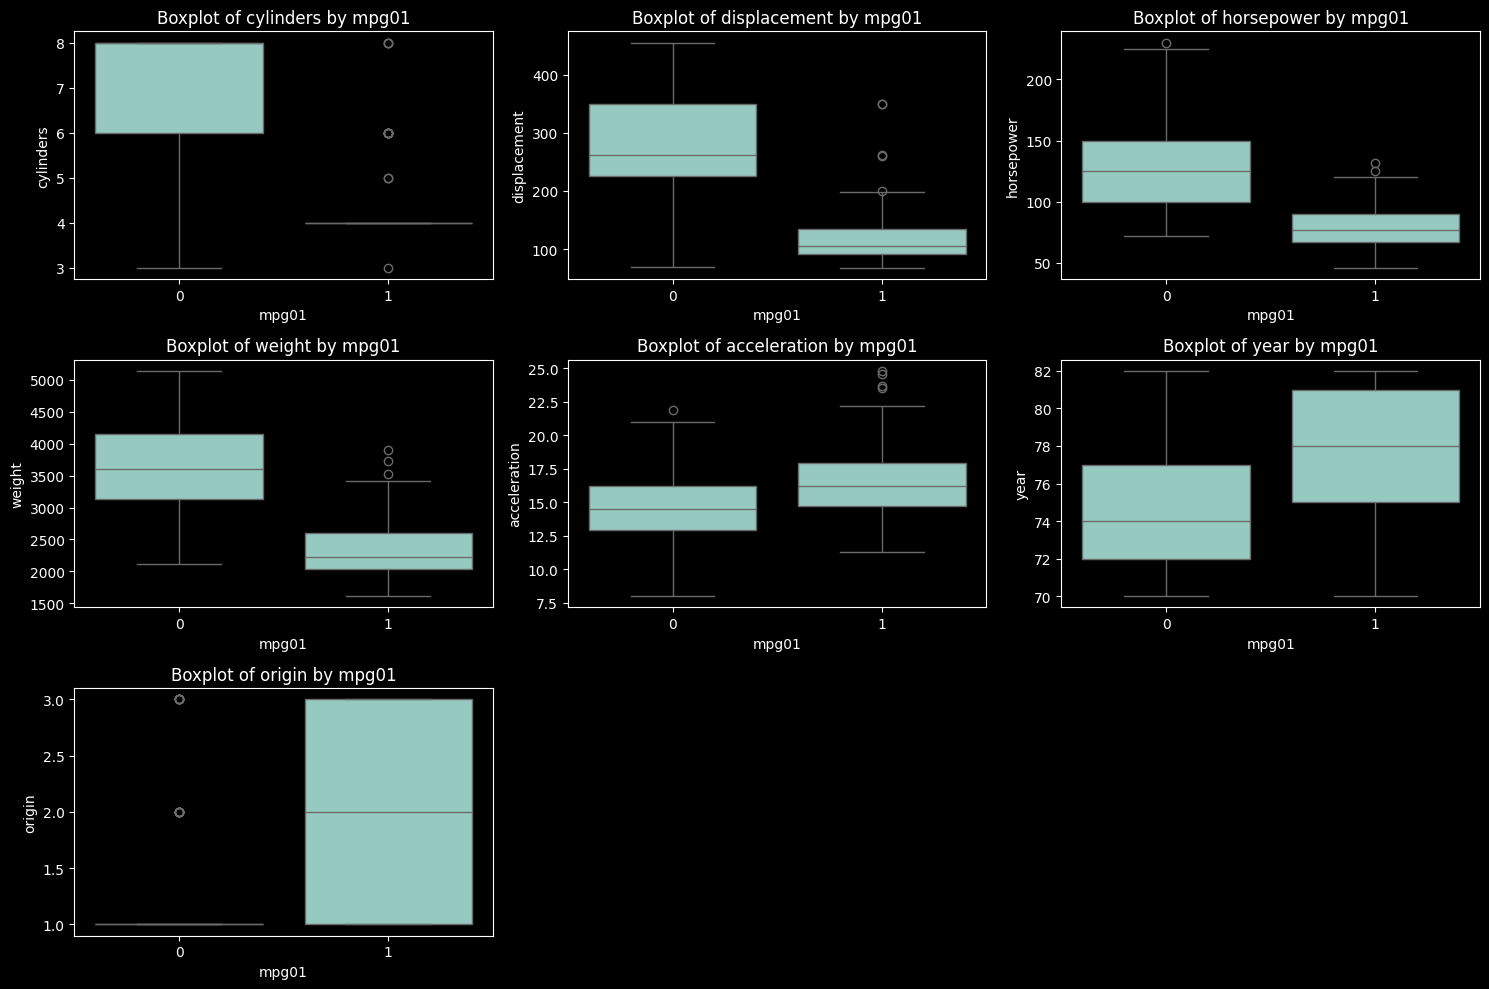

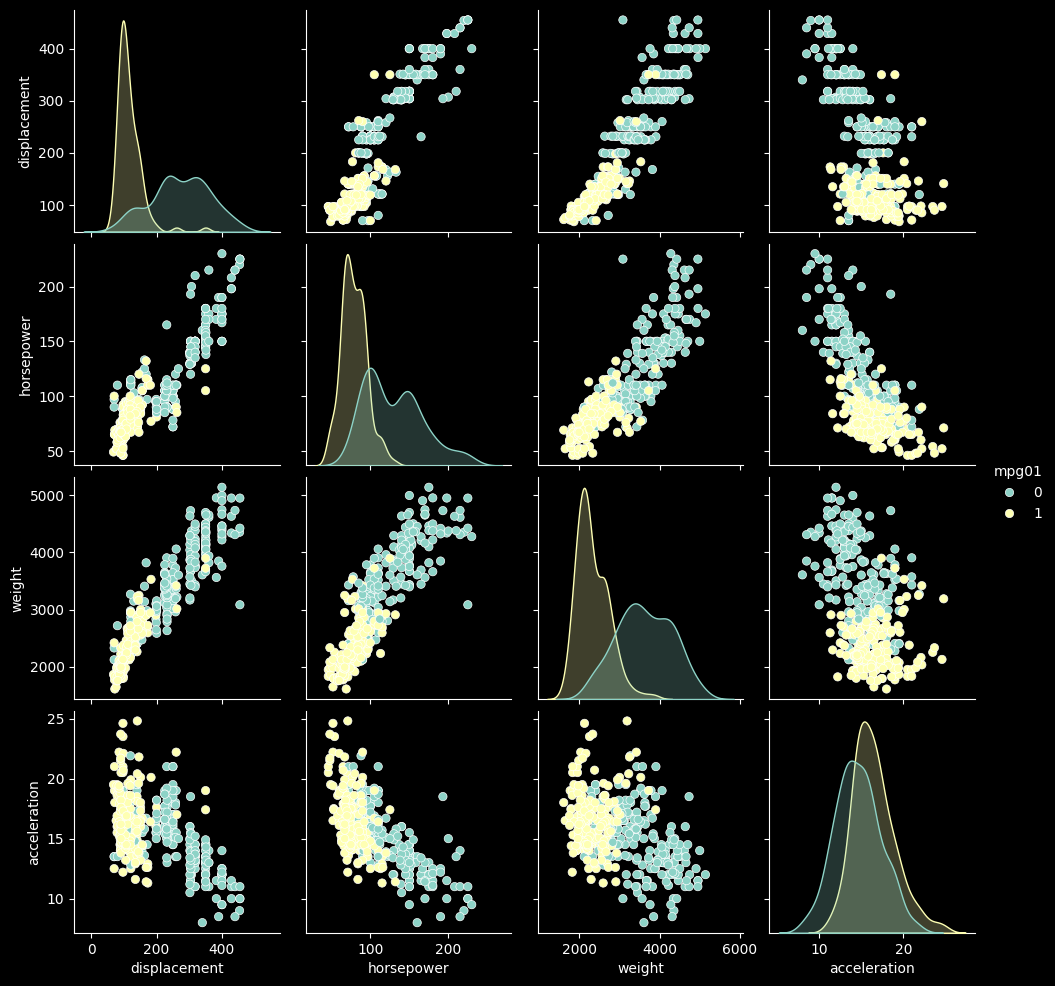

LDA Confusion Matrix:
 [[57  8]
 [ 2 51]]
LDA Accuracy: 0.9152542372881356
QDA Confusion Matrix:
 [[60  5]
 [ 3 50]]
QDA Accuracy: 0.9322033898305084
Logistic Regression Confusion Matrix:
 [[59  6]
 [ 7 46]]
Logistic Regression Accuracy: 0.8898305084745762


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# 데이터 로드 및 전처리
auto_data = pd.read_csv('Auto.csv')

# horsepower 변수를 수치형으로 변환하고, 변환 불가 값은 NaN으로 설정 후 제거
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data = auto_data.dropna()

# (a) mpg01 변수 생성
median_mpg = auto_data['mpg'].median()
auto_data['mpg01'] = (auto_data['mpg'] > median_mpg).astype(int)

# (b) mpg01과 다른 변수 간의 관계 시각화
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

# Boxplots for categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='mpg01', y=feature, data=auto_data)
    plt.title(f'Boxplot of {feature} by mpg01')
plt.tight_layout()
plt.show()

# Scatter plots for continuous features
sns.pairplot(auto_data, hue='mpg01', vars=['displacement', 'horsepower', 'weight', 'acceleration'])
plt.show()

# (c) 데이터를 훈련 세트와 테스트 세트로 분할
X = auto_data[['displacement', 'horsepower', 'weight', 'acceleration']]
y = auto_data['mpg01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# (d) LDA 모델 학습 및 평가
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("LDA Confusion Matrix:\n", conf_matrix_lda)
print("LDA Accuracy:", accuracy_lda)

# (e) QDA 모델 학습 및 평가
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print("QDA Confusion Matrix:\n", conf_matrix_qda)
print("QDA Accuracy:", accuracy_qda)

# (f) 로지스틱 회귀 모델 학습 및 평가
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log)
print("Logistic Regression Accuracy:", accuracy_log)


(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

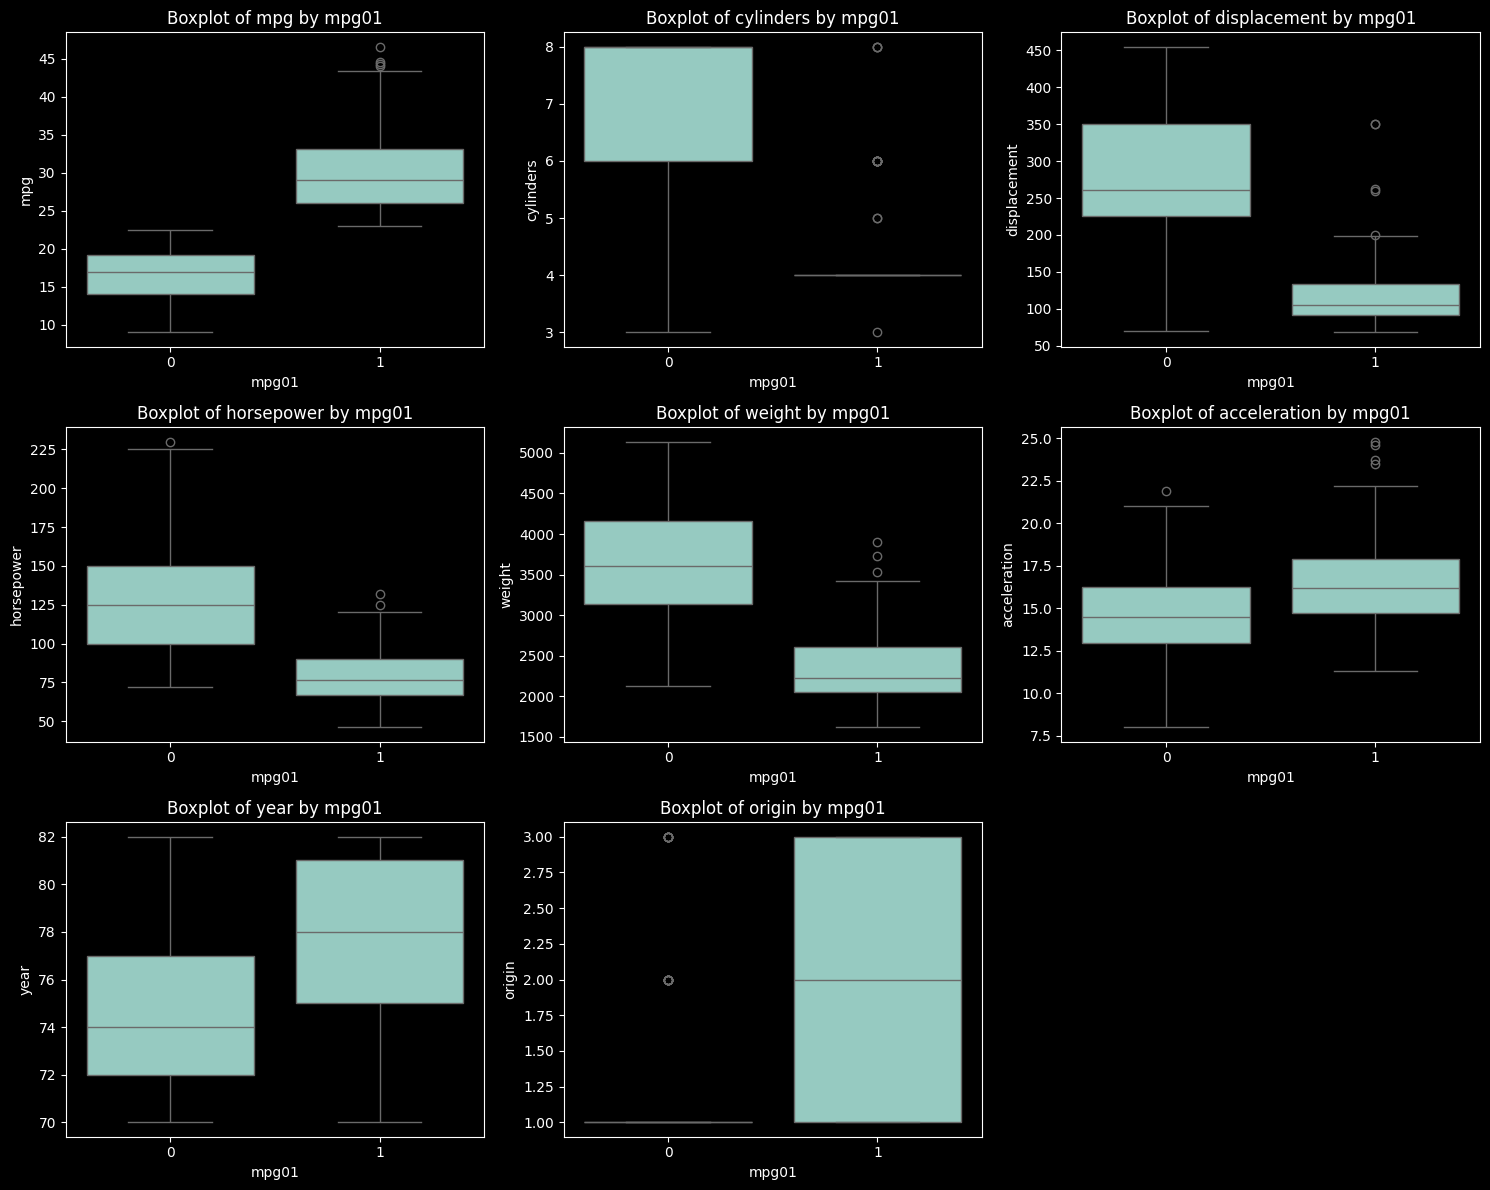

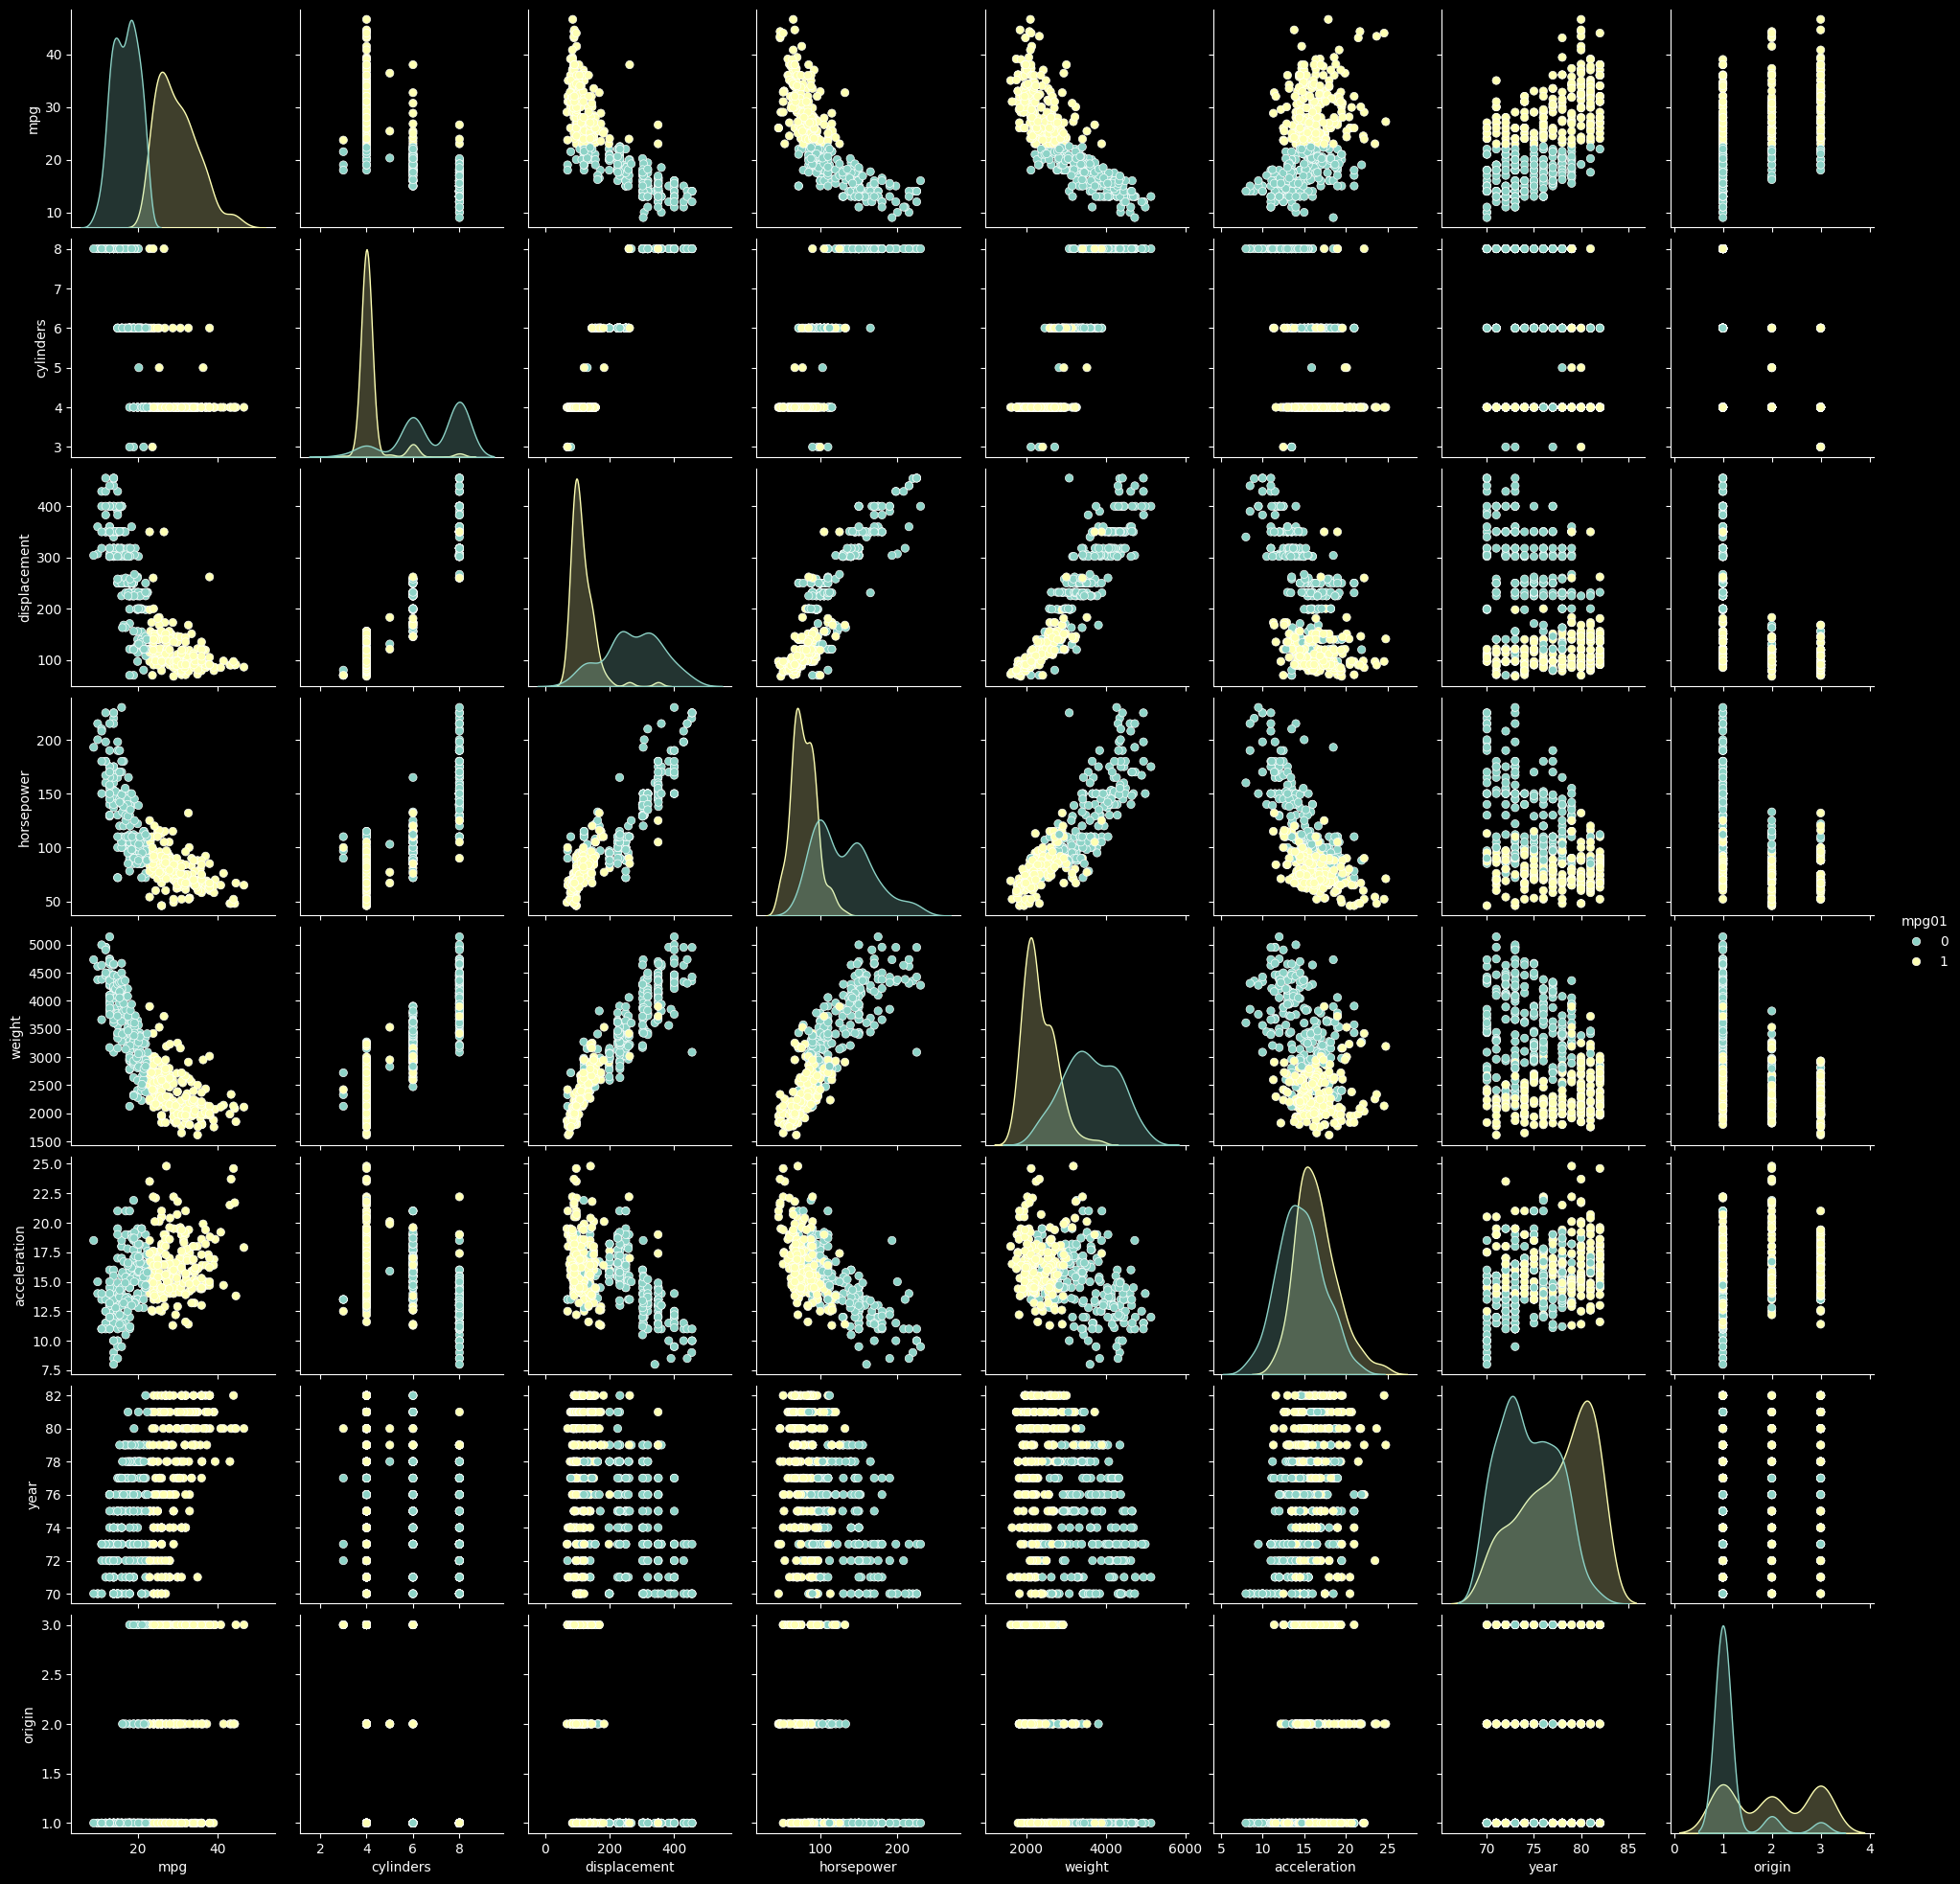

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
auto_data = pd.read_csv('Auto.csv')

# horsepower 변수를 수치형으로 변환하고, 변환 불가 값은 NaN으로 설정 후 제거
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data = auto_data.dropna()

# mpg01 변수 생성
median_mpg = auto_data['mpg'].median()
auto_data['mpg01'] = (auto_data['mpg'] > median_mpg).astype(int)

# (b) mpg01과 다른 모든 변수 간의 관계 시각화

# 1. Boxplots for mpg01 and other features
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='mpg01', y=feature, data=auto_data)
    plt.title(f'Boxplot of {feature} by mpg01')
plt.tight_layout()
plt.show()

# 2. Pairplot for scatterplot exploration
sns.pairplot(auto_data, hue='mpg01', vars=features)
plt.show()


(c) Split the data into a training set and a test set.

In [5]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# 데이터 로드 및 전처리
auto_data = pd.read_csv('Auto.csv')
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data = auto_data.dropna()

# mpg01 변수 생성
median_mpg = auto_data['mpg'].median()
auto_data['mpg01'] = (auto_data['mpg'] > median_mpg).astype(int)

# 예측 변수 및 반응 변수 설정 (유용한 변수 선택)
X = auto_data[['cylinders', 'displacement', 'horsepower', 'weight', 'year']]
y = auto_data['mpg01']

# 데이터 분할 (70% 훈련, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [6]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# 데이터 로드 및 전처리
auto_data = pd.read_csv('Auto.csv')
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data = auto_data.dropna()

# mpg01 변수 생성
median_mpg = auto_data['mpg'].median()
auto_data['mpg01'] = (auto_data['mpg'] > median_mpg).astype(int)

# 유용한 변수 선택 (cylinders, displacement, horsepower, weight, year)
X = auto_data[['cylinders', 'displacement', 'horsepower', 'weight', 'year']]
y = auto_data['mpg01']

# 데이터 분할 (70% 훈련, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# (d) LDA 모델 학습 및 평가
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# 혼동 행렬과 정확도 계산
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
test_error_lda = 1 - accuracy_lda  # 테스트 오류율은 1 - 정확도

# 결과 출력
print("LDA Confusion Matrix:\n", conf_matrix_lda)
print("LDA Accuracy:", accuracy_lda)
print("LDA Test Error:", test_error_lda)


LDA Confusion Matrix:
 [[56  9]
 [ 1 52]]
LDA Accuracy: 0.9152542372881356
LDA Test Error: 0.0847457627118644


In [7]:
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# 데이터 로드 및 전처리
auto_data = pd.read_csv('Auto.csv')
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data = auto_data.dropna()

# mpg01 변수 생성
median_mpg = auto_data['mpg'].median()
auto_data['mpg01'] = (auto_data['mpg'] > median_mpg).astype(int)

# 유용한 변수 선택 (cylinders, displacement, horsepower, weight, year)
X = auto_data[['cylinders', 'displacement', 'horsepower', 'weight', 'year']]
y = auto_data['mpg01']

# 데이터 분할 (70% 훈련, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# (e) QDA 모델 학습 및 평가
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

# 혼동 행렬과 정확도 계산
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
test_error_qda = 1 - accuracy_qda  # 테스트 오류율은 1 - 정확도

# 결과 출력
print("QDA Confusion Matrix:\n", conf_matrix_qda)
print("QDA Accuracy:", accuracy_qda)
print("QDA Test Error:", test_error_qda)


QDA Confusion Matrix:
 [[59  6]
 [ 4 49]]
QDA Accuracy: 0.9152542372881356
QDA Test Error: 0.0847457627118644


(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [8]:
from sklearn.linear_model import LogisticRegression

# (f) 로지스틱 회귀 모델 학습 및 평가
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred_log = log_reg.predict(X_test)

# 혼동 행렬과 정확도 계산
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)
test_error_log = 1 - accuracy_log  # 테스트 오류율은 1 - 정확도

# 결과 출력
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log)
print("Logistic Regression Accuracy:", accuracy_log)
print("Logistic Regression Test Error:", test_error_log)


Logistic Regression Confusion Matrix:
 [[59  6]
 [ 0 53]]
Logistic Regression Accuracy: 0.9491525423728814
Logistic Regression Test Error: 0.05084745762711862


3. Using the Boston data set, fit classification models in order to predict whether a given census tract has a crime rate above or below the median.
Explore logistic regression, LDA, and QDA methods using various subsets of the predictors. Describe your findings.
Hint: You will have to create the response variable yourself, using the variables that are contained in the Boston data set.